Referenced code from
- https://medium.com/analytics-vidhya/building-classification-model-with-python-9bdfc13faa4b
- https://www.kaggle.com/code/adityapatro/croprecommender

In [1]:
# Import statements
import numpy as np
import pandas as pd

In [2]:
# Import for data visualizations, relevant models?
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from joblib import dump, load
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
from tensorflow.keras.models import load_model

1. EDA (Dataset of Indian Crop Yield)

In [3]:
# Load the dataset
dataSet = pd.read_csv('../dataset/Crop_recommendation.csv')

In [4]:
dataSet

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [5]:
# Check missing parts in the dataset (null)
dataSet.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

2. Preprocessing 

In [6]:
# Scale numeric values
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
dataSet_ready = dataSet.copy()

scaler = StandardScaler()
num_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'rainfall']
dataSet_ready[num_cols] = scaler.fit_transform(dataSet[num_cols])

dataSet_ready.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,6.502985,1.810361,rice
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,7.038096,2.242058,rice
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,7.840207,2.921066,rice
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,6.980401,2.537048,rice
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,7.628473,2.898373,rice


In [7]:
# Set input and output
from sklearn.preprocessing import label_binarize

# Input as X
X = dataSet[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]

# Output as Y
y = dataSet['label']

In [8]:
features = dataSet[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = dataSet['label']
labels = dataSet['label']

In [9]:
# Train and Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (1760, 7)
Shape of testing feature: (440, 7)
Shape of training label: (1760,)
Shape of training label: (440,)


3. Modelling: Decision Tree, Random Forest, Naive Bayes, KNN

In [10]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
prec = []
recall = []
f1 = []
cm = []
model = []

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

def eval_model(model_name, y_test, predicted_values):
    # Evaluate using accuracy, precision, recall, and f1 score
    x = metrics.accuracy_score(y_test, predicted_values)
    acc.append(x)
    prec.append(metrics.precision_score(y_test, predicted_values, average='weighted'))
    recall.append(metrics.recall_score(y_test, predicted_values, average='weighted'))
    f1.append(metrics.f1_score(y_test, predicted_values, average='weighted'))
    model.append(model_name)

    # Display confusion matrix
    cm = metrics.confusion_matrix(y_test, predicted_values)

    # Print the report
    print(classification_report(y_test,predicted_values))
    print(cm)

Decision Tree

In [12]:
# Build decision tree model
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)

# Evaluate 
eval_model('Decision Tree', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       0.90      1.00      0.95        18
   blackgram       0.69      1.00      0.81        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      0.94      0.97        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       1.00      0.24      0.39        25
 kidneybeans       1.00      0.80      0.89        20
      lentil       0.95      1.00      0.97        18
       maize       0.95      1.00      0.98        20
       mango       1.00      0.94      0.97        17
   mothbeans       1.00      0.71      0.83        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [13]:
# Print result
from sklearn.model_selection import cross_val_score

score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [14]:
dataSet['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

[Text(0.506578947368421, 0.9166666666666666, 'humidity <= 74.862\nsamples = 1760\nvalue = [78, 82, 78, 85, 82, 83, 78, 71, 75, 80, 82, 80\n83, 76, 76, 74, 85, 86, 81, 77, 87, 81]\nclass = jute'),
 Text(0.28289473684210525, 0.75, 'K <= 25.5\nsamples = 749\nvalue = [0, 0, 78, 85, 0, 83, 0, 0, 21, 80, 82, 80, 83\n76, 0, 0, 0, 0, 81, 0, 0, 0]\nclass = kidneybeans'),
 Text(0.17105263157894737, 0.5833333333333334, 'rainfall <= 74.974\nsamples = 490\nvalue = [0, 0, 78, 0, 0, 7, 0, 0, 0, 80, 82, 80, 6\n76, 0, 0, 0, 0, 81, 0, 0, 0]\nclass = banana'),
 Text(0.10526315789473684, 0.4166666666666667, 'rainfall <= 59.733\nsamples = 277\nvalue = [0, 0, 78, 0, 0, 0, 0, 0, 0, 12, 82, 29, 0\n76, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = banana'),
 Text(0.05263157894736842, 0.25, 'humidity <= 60.029\nsamples = 131\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 49\n0, 0, 0, 0, 0, 0, 0, 0]\nclass = banana'),
 Text(0.02631578947368421, 0.08333333333333333, 'samples = 40\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

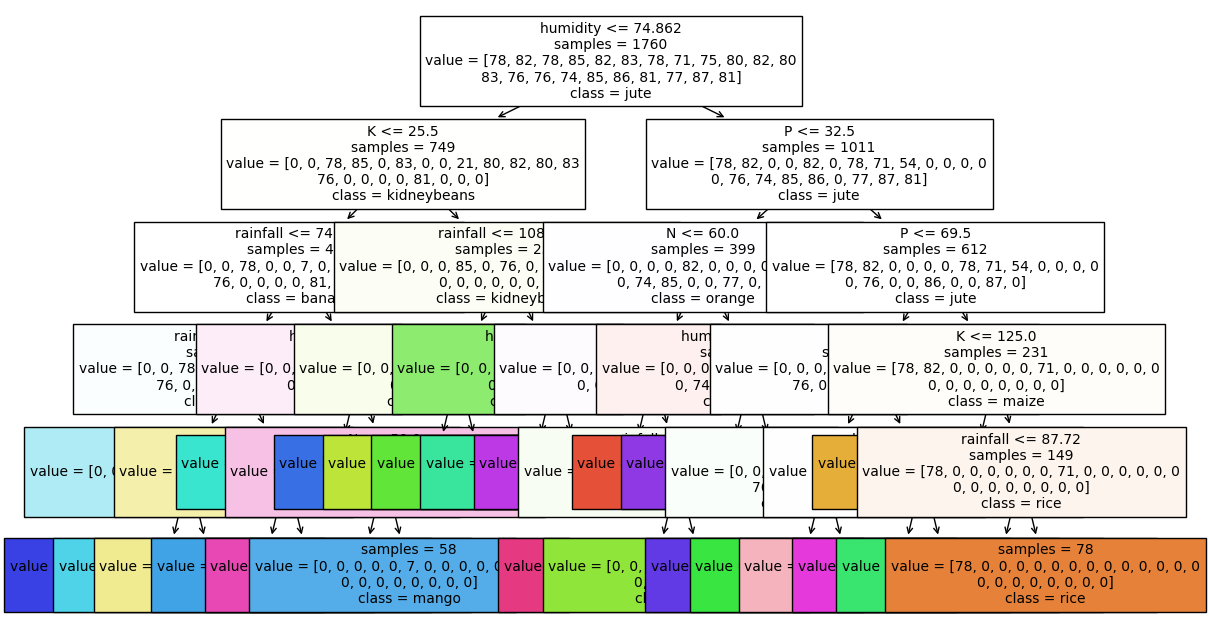

In [15]:
# Call custom_plot_tree to visualize the customized tree
from sklearn import tree
plt.figure(figsize=(12,8))
plot_tree(DecisionTree,
          feature_names=X_train.columns.tolist(),
          class_names=['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
          filled=True,
          impurity=False,
          fontsize=10)

Random Forest Classifier

In [16]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train,y_train)

predicted_values = RF.predict(X_test)

# Evaluate 
eval_model('Random Forest', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.92      1.00      0.96        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [17]:
# Evaluate Model
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

# Evaluate 
eval_model('Naive Bayes', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.93      1.00      0.96        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [19]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

KNN

In [20]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predicted_values = knn.predict(X_test)

# Evaluate
eval_model('KNN', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       0.96      1.00      0.98        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       0.96      1.00      0.98        22
      grapes       1.00      1.00      1.00        29
        jute       0.92      0.96      0.94        25
 kidneybeans       0.91      1.00      0.95        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      0.95      0.97        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    

In [21]:
# Cross validation score (KNN)
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

Logistic Regression

In [22]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)

# Evaluate
eval_model('Logistic Regression', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       0.94      1.00      0.97        17
      cotton       0.91      0.95      0.93        22
      grapes       1.00      1.00      1.00        29
        jute       0.92      0.88      0.90        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.90      1.00      0.95        18
       maize       0.94      0.85      0.89        20
       mango       1.00      1.00      1.00        17
   mothbeans       0.96      0.96      0.96        24
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       0.92    

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
score = cross_val_score(LogReg,features,target,cv=5)
score

c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

SVM

In [24]:
from sklearn.svm import SVC

# Build SVC Model
SVM = SVC(gamma='auto')
SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)

# Evaluate
eval_model('SVM', y_test, predicted_values)

              precision    recall  f1-score   support

       apple       1.00      0.09      0.17        22
      banana       1.00      0.17      0.29        18
   blackgram       1.00      0.05      0.09        22
    chickpea       1.00      0.20      0.33        15
     coconut       1.00      0.06      0.11        18
      coffee       0.00      0.00      0.00        17
      cotton       1.00      0.05      0.09        22
      grapes       0.00      0.00      0.00        29
        jute       0.00      0.00      0.00        25
 kidneybeans       1.00      0.05      0.10        20
      lentil       0.00      0.00      0.00        18
       maize       0.00      0.00      0.00        20
       mango       1.00      0.18      0.30        17
   mothbeans       0.00      0.00      0.00        24
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.27      0.42        26
      orange       1.00      0.07      0.12        15
      papaya       0.00    

c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precisio

In [32]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

4. Model Comparison

In [26]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\clara\AppData\Local\Temp\ipykernel_2832\692061275.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_2832\692061275.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = prec,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_2832\692061275.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = recall,y = model,palette='dark')
C:\Users\clara\AppData\Local\Temp\ipykernel_2832\692061275.py:25: FutureWarning: 

Passing `palette` witho

<Axes: title={'center': 'F1 Score Comparison'}, xlabel='F1 score', ylabel='Algorithm'>

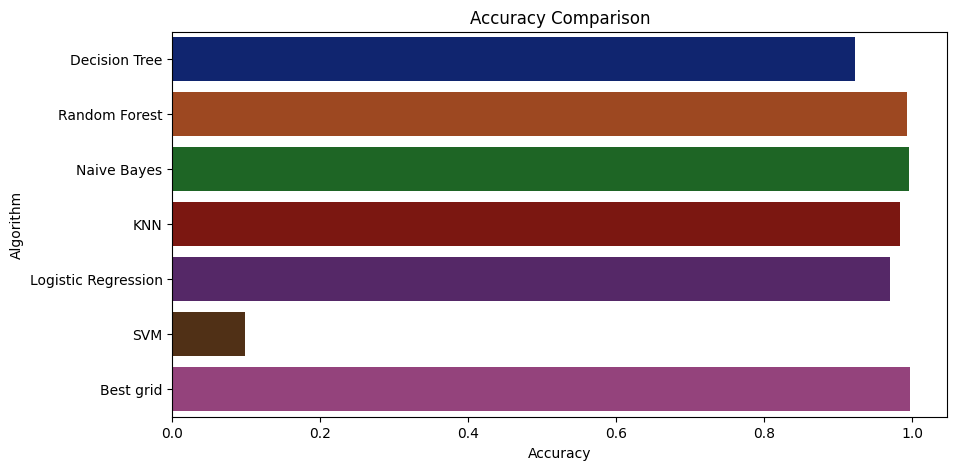

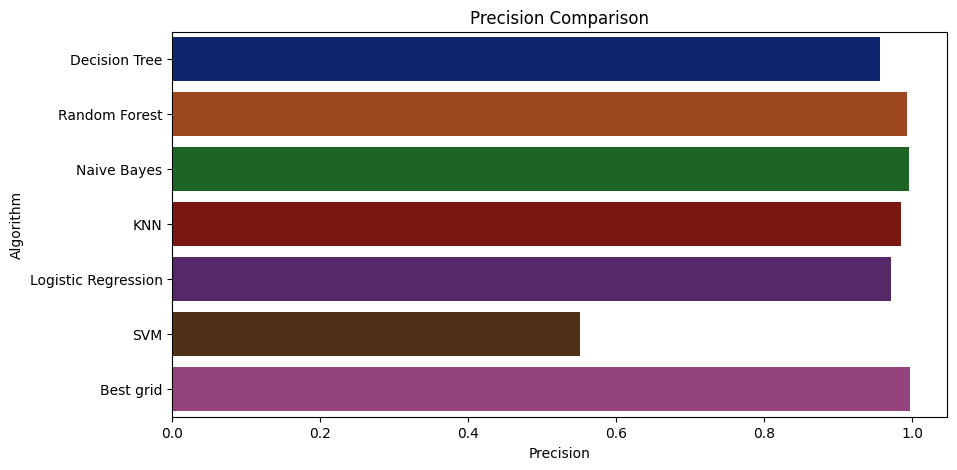

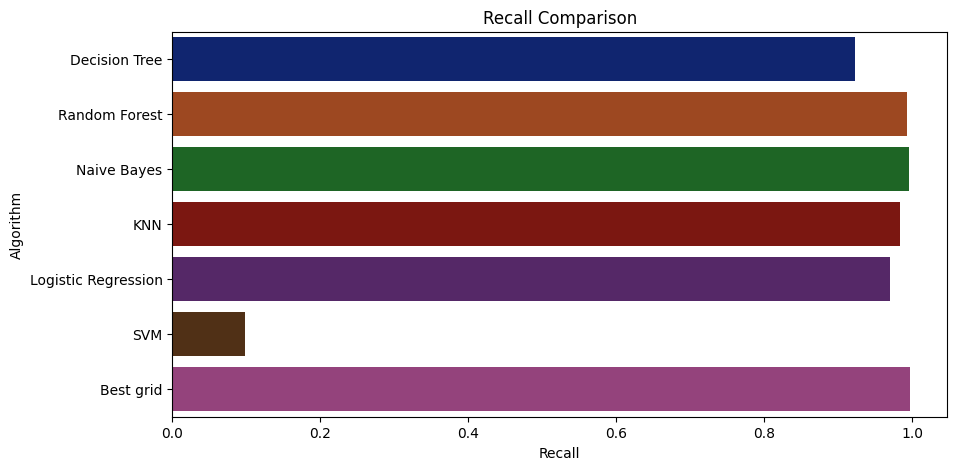

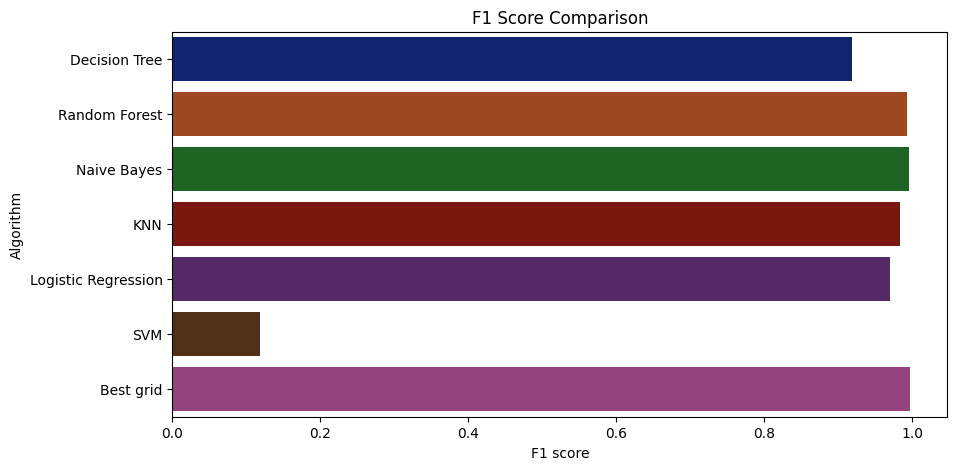

In [40]:
import seaborn as sns

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Precision Comparison')
plt.xlabel('Precision')
plt.ylabel('Algorithm')
sns.barplot(x = prec,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('Recall Comparison')
plt.xlabel('Recall')
plt.ylabel('Algorithm')
sns.barplot(x = recall,y = model,palette='dark')

plt.figure(figsize=[10,5],dpi = 100)
plt.title('F1 Score Comparison')
plt.xlabel('F1 score')
plt.ylabel('Algorithm')
sns.barplot(x = f1,y = model,palette='dark')

In [29]:
# Confusion matrix for each of the model
# TBU
cm

[]

5. Model Optimization

In [30]:
# Tuning hyperparmeters with GridSearchCV
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='recall',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


c:\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan n

{'max_depth': 50,
 'max_features': 2,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [39]:
# Select best model with best fit
best_grid = grid_search.best_estimator_
predicted_values = best_grid.predict(X_test)

# Evaluate Model
best_grid_eval = eval_model('Best grid', y_test, predicted_values)
print(acc[6])
print(prec[6])
print(recall[6])
print(f1[6])

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        22
      banana       1.00      1.00      1.00        18
   blackgram       1.00      1.00      1.00        22
    chickpea       1.00      1.00      1.00        15
     coconut       1.00      1.00      1.00        18
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        22
      grapes       1.00      1.00      1.00        29
        jute       0.96      1.00      0.98        25
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        18
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        17
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        26
      orange       1.00      1.00      1.00        15
      papaya       1.00    